# Humana Mays Healthcare Analytics

Arjun Bingly

In [124]:
import pandas
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import seaborn
import os

In [125]:
data_path = os.getcwd()+'/data'
data_filenames = os.listdir(data_path)
data_filenames = [filename for filename in data_filenames if filename.endswith('.csv')]
print(data_filenames)

['rxclms_holdout.csv', 'target_train.csv', 'target_holdout.csv', 'race_cd_desc.csv', 'medclms_holdout.csv', 'medclms_train.csv', 'data_dictionary.csv', 'rxclms_train.csv']


## Target

In [126]:
target_df = pd.read_csv(f'{data_path}/target_train.csv',
                        parse_dates=['therapy_start_date', 'therapy_end_date'])
target_df

,id,therapy_id,therapy_start_date,therapy_end_date,tgt_ade_dc_ind,race_cd,est_age,sex_cd,cms_disabled_ind,cms_low_income_ind
0,1005597228,1005597228-TAGRISSO-1,2020-03-11 00:00:00+00:00,2020-09-07,0,1.0,NaN,NaN,NaN,NaN
1,1005964858,1005964858-TAGRISSO-1,2021-08-23 00:00:00+00:00,2021-09-22,1,1.0,86.0,M,0.0,0.0
2,1007548572,1007548572-TAGRISSO-1,2022-01-17 00:00:00+00:00,2022-07-16,0,1.0,79.0,F,0.0,1.0
3,1009508044,1009508044-TAGRISSO-1,2020-01-23 00:00:00+00:00,2020-07-21,0,1.0,70.0,F,1.0,1.0
4,1028064791,1028064791-TAGRISSO-1,2021-02-23 00:00:00+00:00,2021-08-22,0,2.0,74.0,F,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
1227,1005265852,1005265852-TAGRISSO-1,2022-01-18 00:00:00+00:00,2022-05-01,1,5.0,91.0,F,0.0,0.0
1228,1017236720,1017236720-TAGRISSO-1,2019-09-10 00:00:00+00:00,2020-03-08,0,1.0,79.0,M,0.0,0.0
1229,1059781692,1059781692-TAGRISSO-1,2020-03-10 00:00:00+00:00,2020-09-06,0,4.0,81.0,F,0.0,1.0
1230,1106680931,1106680931-TAGRISSO-1,2021-03-01 00:00:00+00:00,2021-03-31,0,1.0,50.0,M,1.0,0.0


In [127]:
_dict = pd.read_csv(f"{data_path}/race_cd_desc.csv").set_index('race_cd').to_dict()['race_cd_desc']


In [128]:
target_df.sex_cd=target_df.sex_cd.astype("category")
target_df.tgt_ade_dc_ind = target_df.tgt_ade_dc_ind.astype("category").cat.rename_categories({0: 'False', 1:'True'})
target_df.race_cd=target_df.race_cd.astype("category").cat.rename_categories(_dict)
target_df.cms_disabled_ind = target_df.cms_disabled_ind.astype("category")
target_df.cms_low_income_ind = target_df.cms_low_income_ind.astype("category")

In [129]:
target_df.dtypes

id                                  int64
therapy_id                         object
therapy_start_date    datetime64[ns, UTC]
therapy_end_date           datetime64[ns]
tgt_ade_dc_ind                   category
race_cd                          category
est_age                           float64
sex_cd                           category
cms_disabled_ind                 category
cms_low_income_ind               category
dtype: object

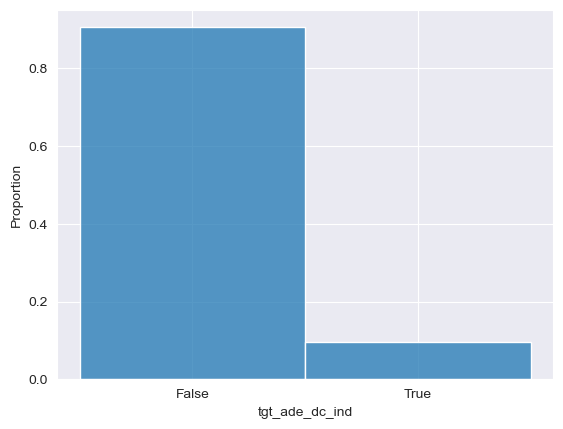

In [138]:
seaborn.histplot(target_df, x='tgt_ade_dc_ind', stat='proportion', discrete=True)
plt.show()

In [131]:
target_df.est_age.describe()

count    1149.000000
mean       73.771976
std         8.517059
min        38.000000
25%        68.000000
50%        73.000000
75%        80.000000
max        96.000000
Name: est_age, dtype: float64

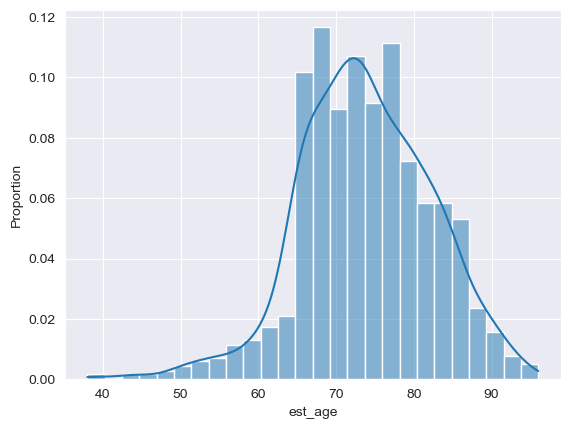

In [133]:
seaborn.histplot(target_df, x='est_age', stat='proportion', kde=True)
plt.show()

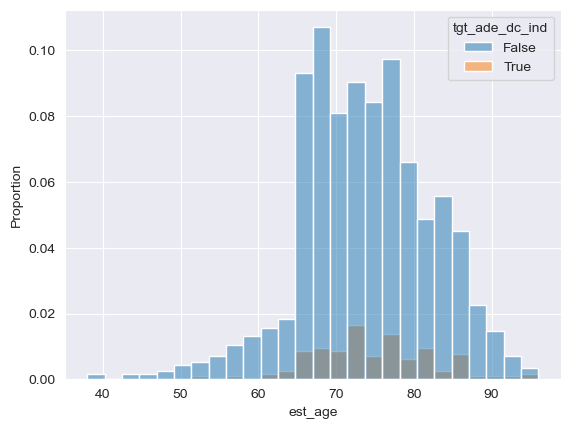

In [122]:
seaborn.histplot(target_df, x='est_age', hue='tgt_ade_dc_ind', stat='proportion')
plt.show()

In [130]:
target_df.describe(include='category') #all

,tgt_ade_dc_ind,race_cd,sex_cd,cms_disabled_ind,cms_low_income_ind
count,1232,1164,1149,1149.0,1149.0
unique,2,7,2,2.0,2.0
top,False,white,F,0.0,0.0
freq,1115,699,815,980.0,703.0


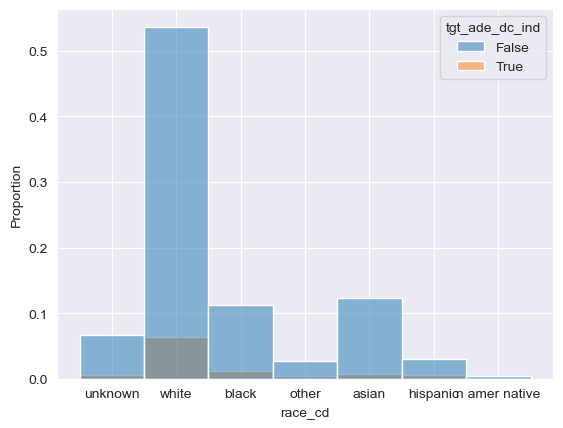

In [139]:
seaborn.histplot(target_df, x='race_cd', hue='tgt_ade_dc_ind', stat='proportion')
plt.show()

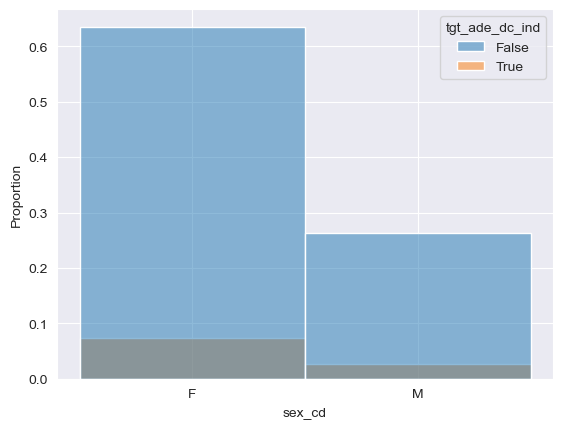

In [140]:
seaborn.histplot(target_df, x='sex_cd', hue='tgt_ade_dc_ind', stat='proportion', discrete=True)
plt.show()

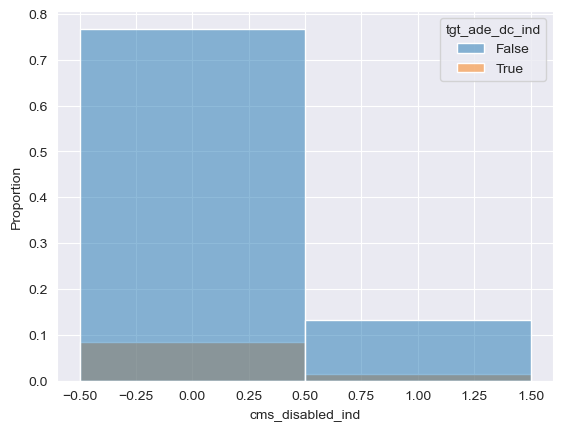

In [141]:
seaborn.histplot(target_df, x='cms_disabled_ind', hue='tgt_ade_dc_ind', stat='proportion', discrete=True)
plt.show()


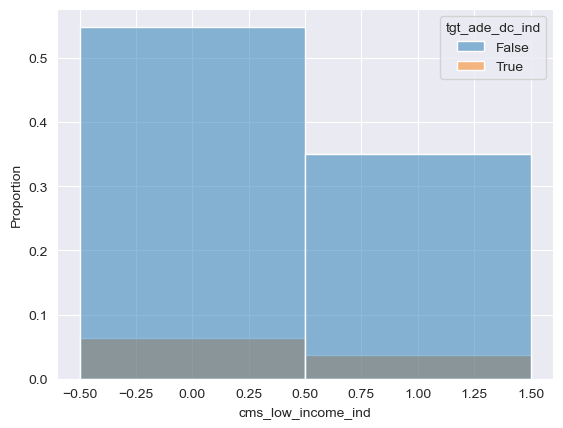

In [142]:
seaborn.histplot(target_df, x='cms_low_income_ind', hue='tgt_ade_dc_ind',stat='proportion', discrete=True)
plt.show()

## Rx Claims

In [146]:
rxclms_df = pd.read_csv(f'{data_path}/rxclms_train.csv',
                        parse_dates=['service_date', 'process_date'])
rxclms_df

,therapy_id,document_key,ndc_id,service_date,process_date,pay_day_supply_cnt,rx_cost,tot_drug_cost_accum_amt,reversal_ind,mail_order_ind,...,hum_drug_class_desc,strength_meas,metric_strength,specialty_ind,clm_type,ddi_ind,anticoag_ind,diarrhea_treat_ind,nausea_treat_ind,seizure_treat_ind
0,1009508044-TAGRISSO-1,A184611654291011,169266015,2018-03-02 00:00:00+00:00,2019-12-04 00:00:00+00:00,30,919.78,2830.22,N,N,...,DIABETES,UNIT/ML,100.000,NONSPCL,rx,0,0,0,0,0
1,1023838279-TAGRISSO-1,A184877988141011,69097022416,2018-03-28 00:00:00+00:00,2020-03-13 00:00:00+00:00,28,5.00,1138.66,N,N,...,OSTEOPOROSIS,MG,70.000,NONSPCL,rx,0,0,0,0,0
2,1023838279-TAGRISSO-1,A185952462961011,60505257908,2018-07-14 00:00:00+00:00,2020-03-13 00:00:00+00:00,30,7.30,2693.11,N,N,...,CHOLESTEROL,MG,20.000,NONSPCL,rx,0,0,0,0,0
3,1023838279-TAGRISSO-1,A186219930881011,65862057290,2018-08-09 00:00:00+00:00,2020-03-17 00:00:00+00:00,30,12.20,2718.31,N,N,...,CARDIOLOGY - HYPERTENSION AGENTS,MG,160.000,NONSPCL,rx,0,0,0,0,0
4,1071647492-TAGRISSO-1,A194013465121011,16252060144,2019-01-01 00:00:00+00:00,2020-03-03 00:00:00+00:00,90,9.90,0.00,N,Y,...,OSTEOPOROSIS,MG,70.000,NONSPCL,rx,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32128,1013396924-TAGRISSO-1,M507381525551001,43547027509,2020-12-03 00:00:00+00:00,2020-12-04 00:00:00+00:00,30,5.20,22.60,N,N,...,MENTAL HEALTH - ANTI-DEMENTIA AGENTS,MG,5.000,NONSPCL,rx,0,0,0,0,0
32129,1050705030-TAGRISSO-1,M517443068761011,61314054701,2021-12-10 00:00:00+00:00,2021-12-28 00:00:00+00:00,90,24.59,14676.67,N,Y,...,OPHTHALMOLOGY - GLAUCOMA AGENTS,%,0.005,NONSPCL,rx,0,0,0,0,0
32130,1120826442-TAGRISSO-1,M524312133731011,51672130100,2022-01-31 00:00:00+00:00,2022-02-22 00:00:00+00:00,30,35.15,14756.31,N,N,...,DERMATOLOGY,%,12.000,NONSPCL,rx,0,0,0,0,0
32131,1121652095-TAGRISSO-1,M524683055321011,2823305,2022-03-09 00:00:00+00:00,2022-03-23 00:00:00+00:00,26,155.64,1493.13,N,N,...,DIABETES,-25/ML,75.000,NONSPCL,rx,0,0,0,0,0


In [1]:
rxclms_df.columns

NameError: name 'rxclms_df' is not defined

In [150]:
rxclms_df.gpi_drug_group_desc.unique()

array(['*ANTIDIABETICS*', '*ENDOCRINE AND METABOLIC AGENTS - MISC.*',
       '*ANTIHYPERLIPIDEMICS*', '*ANTIHYPERTENSIVES*',
       '*CORTICOSTEROIDS*', '*ANTIANXIETY AGENTS*',
       '*ANALGESICS - OPIOID*', '*ANTICONVULSANTS*', '*ANTIEMETICS*',
       '*BETA BLOCKERS*', '*ANTINEOPLASTICS AND ADJUNCTIVE THERAPIES*',
       '*COUGH/COLD/ALLERGY*', '*ANTICOAGULANTS*',
       '*ANTI-INFECTIVE AGENTS - MISC.*',
       '*GASTROINTESTINAL AGENTS - MISC.*', '*DIURETICS*',
       '*MINERALS & ELECTROLYTES*',
       '*PSYCHOTHERAPEUTIC AND NEUROLOGICAL AGENTS - MISC.*',
       '*ULCER DRUGS/ANTISPASMODICS/ANTICHOLINERGICS*', nan,
       '*ANALGESICS - ANTI-INFLAMMATORY*', '*ANTIDEPRESSANTS*',
       '*MUSCULOSKELETAL THERAPY AGENTS*', '*DERMATOLOGICALS*',
       '*OPHTHALMIC AGENTS*', '*HEMATOLOGICAL AGENTS - MISC.*',
       '*MOUTH/THROAT/DENTAL AGENTS*', '*MACROLIDES*', '*THYROID AGENTS*',
       '*CALCIUM CHANNEL BLOCKERS*', '*GOUT AGENTS*', '*TETRACYCLINES*',
       '*ANTIASTHMATIC AND BRO

In [151]:
rxclms_df.gpi_drug_class_desc.unique()

array(['*INSULIN**', '*BONE DENSITY REGULATORS**',
       '*HMG COA REDUCTASE INHIBITORS**',
       '*ANGIOTENSIN II RECEPTOR ANTAGONISTS**',
       '*GLUCOCORTICOSTEROIDS**', '*ANTIANXIETY AGENTS - MISC.**',
       '*OPIOID AGONISTS**', '*BENZODIAZEPINES**',
       '*ANTICONVULSANTS - MISC.**', '*5-HT3 RECEPTOR ANTAGONISTS**',
       '*BETA BLOCKERS CARDIO-SELECTIVE**',
       '*INSULIN SENSITIZING AGENTS**',
       '*ANTINEOPLASTIC - EGFR INHIBITORS**', '*ANTITUSSIVES**',
       '*COUMARIN ANTICOAGULANTS**',
       '*ANTI-INFECTIVE MISC. - COMBINATIONS**', '*OPIOID COMBINATIONS**',
       '*INTESTINAL CHOLESTEROL ABSORPTION INHIBITORS**',
       '*GASTROINTESTINAL STIMULANTS**', '*LOOP DIURETICS**',
       '*THIAZIDES AND THIAZIDE-LIKE DIURETICS**', '*POTASSIUM**',
       '*ANTIDEMENTIA AGENTS**', '*ACE INHIBITORS**',
       '*PROTON PUMP INHIBITORS**', nan,
       '*NONSTEROIDAL ANTI-INFLAMMATORY AGENTS (NSAIDS)**',
       '*SELECTIVE SEROTONIN REUPTAKE INHIBITORS (SSRIS)**',
      

In [152]:
rxclms_df.hum_drug_class_desc.unique()

array(['DIABETES', 'OSTEOPOROSIS', 'CHOLESTEROL',
       'CARDIOLOGY - HYPERTENSION AGENTS', 'STEROIDS',
       'MENTAL HEALTH - ANXIETY AGENTS',
       'PAIN MGMT - NARCOTIC ANALGESICS', 'ANTICONVULSANTS',
       'GASTROINTESTINAL DISEASE', 'CHEMOTHERAPY', 'COUGH/ COLD/ ALLERGY',
       'CARDIOLOGY - BLOOD THINNERS', 'ANTI-INFECTIVES',
       'NUTRITIONAL/ VITAMIN', 'MENTAL HEALTH - ANTI-DEMENTIA AGENTS',
       'GASTROINTESTINAL DISEASE - GERD', nan, 'PAIN MGMT - NSAID AGENTS',
       'MENTAL HEALTH - DEPRESSION AGENTS',
       'PAIN MGMT - MUSCLE RELAXANTS', 'DERMATOLOGY',
       'OPHTHALMOLOGY - STEROID AGENTS',
       'CARDIOLOGY - ANTIPLATELET AGENTS', 'EAR/MOUTH/THROAT', 'THYROID',
       'ENDOCRINOLOGY - GOUT', 'RESPIRATORY - ASTHMA',
       'RESPIRATORY - COPD', 'OPHTHALMOLOGY - ALLERGY AGENTS',
       'MENTAL HEALTH - ANTIPSYCHOTIC AGENTS', 'DIABETIC SUPPLIES',
       'GASTROINTESTINAL DISEASE - CONSTIPATION', 'PRODUCTS/ SUPPLIES',
       'OPHTHALMOLOGY', 'SUBSTANCE ABUSE AGE

In [154]:
rxclms_df.strength_meas.unique()

array(['UNIT/ML', 'MG', 'MG-80MG', '-325 MG', 'MG/ML', 'MEQ', 'MG-325MG',
       'MG/5ML', nan, '-12.5 MG', '%', 'MCG', '%-0.05 %', 'MCG/HR',
       'MG-25MG', '-100MG/5', 'MCG/ACT', '-3MG/3', '-125 MG', 'MG/0.8ML',
       '-.025MG', 'GX5/8"', 'MG/0.1ML', '-1000 MG', '-25 MCG', 'MG/0.6ML',
       '-4.5MCG', 'UNIT/GM', 'GM', 'MG/4ML', 'MG-500MG', 'MCG/0.5',
       'MCG/0.5ML', '-50-300', 'MG/0.5ML', 'UNIT', '-160 MG', 'GX 5/32"',
       '-12.5MG', 'GM/10ML', '-10/5', '%-2.5%', 'MG/3ML', 'GM/DOSE',
       'MG/1.7ML', 'MCG/.5ML', '-4.5 MCG', '-25MCG', 'MG-15MG', '-10K-1',
       'MG/GM', 'MCG/INH', '-15/5', 'GAUGE', 'MG-10 MG', 'MG/10ML',
       'UNIT/ACT', 'GM/SCOOP', 'MCG/ML', '-62.5', 'MG-50MG', '-325-40',
       '%-0.5%', '-1.5 MG/5', '-25 MG', '-100 MCG', '-2.5MCG', 'MG-30MG',
       'MCG/0.7', 'MG/0.3ML', 'ML', '-200-25', 'MG/2ML', 'MG/3DAYS',
       '-195', 'MG-20MG', 'MG/1.5ML', 'MG-2 MG', 'MG/0.4ML', '-50 MCG',
       'MG/24HR', '/ML (3)', '-1000MG', 'G', '-30/ML', 'GM/15ML',
   

In [158]:
rxclms_df.clm_type.unique()

array(['rx'], dtype=object)

In [161]:
rxclms_df.reversal_ind=rxclms_df.reversal_ind.astype("category")
rxclms_df.mail_order_ind=rxclms_df.mail_order_ind.astype("category")
rxclms_df.generic_ind=rxclms_df.generic_ind.astype("category")
rxclms_df.specialty_ind=rxclms_df.specialty_ind.astype("category")
rxclms_df.maint_ind=rxclms_df.maint_ind.astype("category")
rxclms_df.clm_type=rxclms_df.clm_type.astype("category")
rxclms_df.ddi_ind=rxclms_df.ddi_ind.astype("category")
rxclms_df.anticoag_ind=rxclms_df.anticoag_ind.astype("category")
rxclms_df.diarrhea_treat_ind=rxclms_df.diarrhea_treat_ind.astype("category")
rxclms_df.nausea_treat_ind=rxclms_df.nausea_treat_ind.astype("category")
rxclms_df.seizure_treat_ind=rxclms_df.seizure_treat_ind.astype("category")

In [165]:
rxclms_df.dtypes

therapy_id                              object
document_key                            object
ndc_id                                   int64
service_date               datetime64[ns, UTC]
process_date               datetime64[ns, UTC]
pay_day_supply_cnt                       int64
rx_cost                                float64
tot_drug_cost_accum_amt                float64
reversal_ind                          category
mail_order_ind                        category
generic_ind                           category
maint_ind                             category
gpi_drug_group_desc                     object
gpi_drug_class_desc                     object
hum_drug_class_desc                     object
strength_meas                           object
metric_strength                        float64
specialty_ind                         category
clm_type                              category
ddi_ind                               category
anticoag_ind                          category
diarrhea_trea

In [176]:
categorical_vars = rxclms_df.dtypes.where(rxclms_df.dtypes == 'category').dropna().index

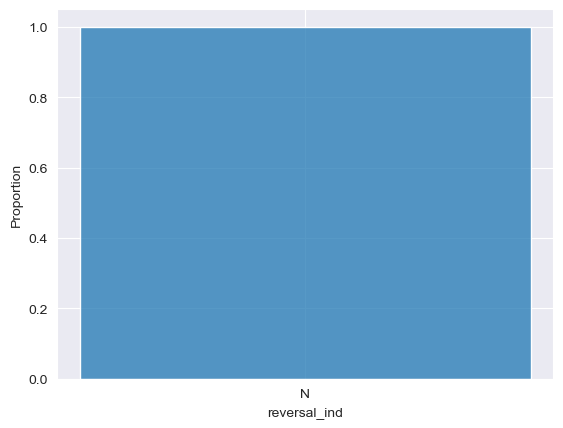

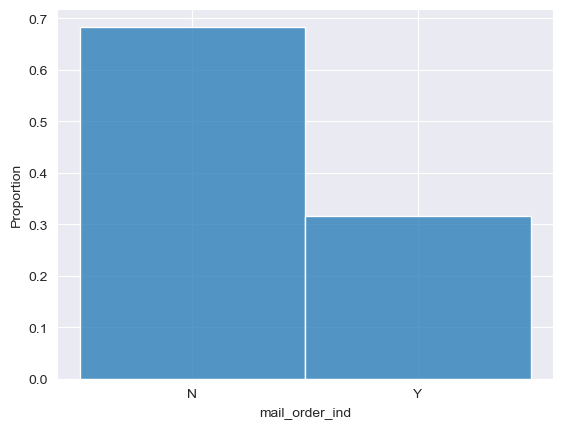

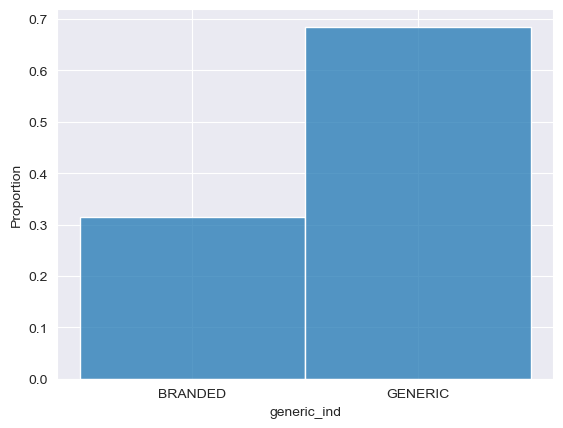

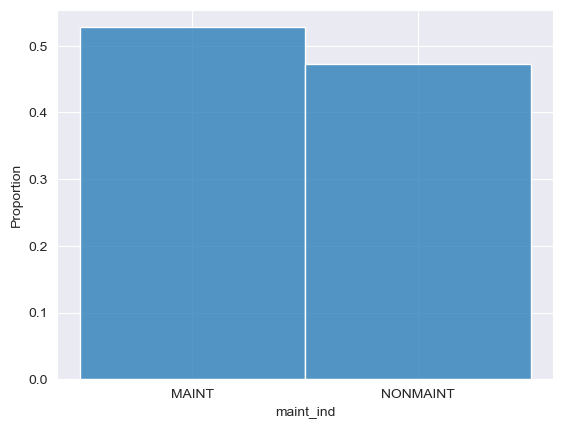

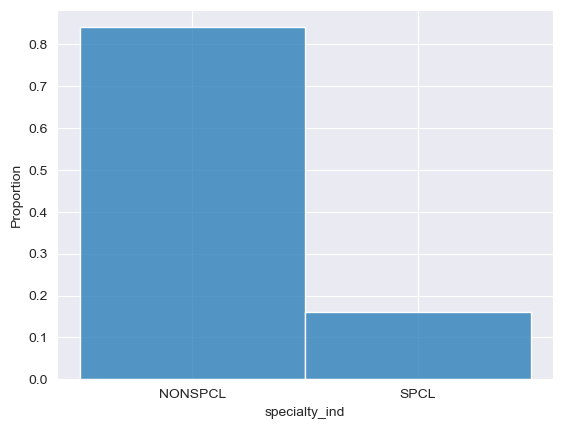

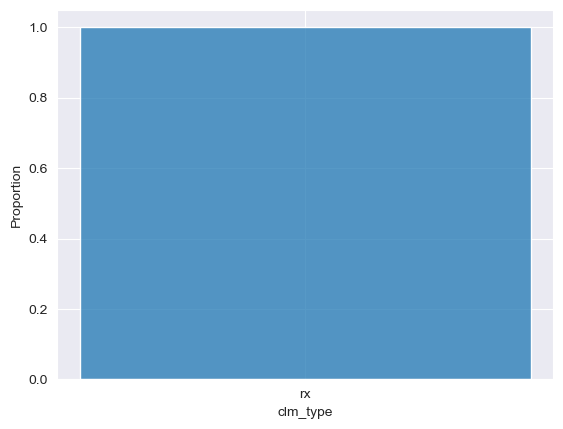

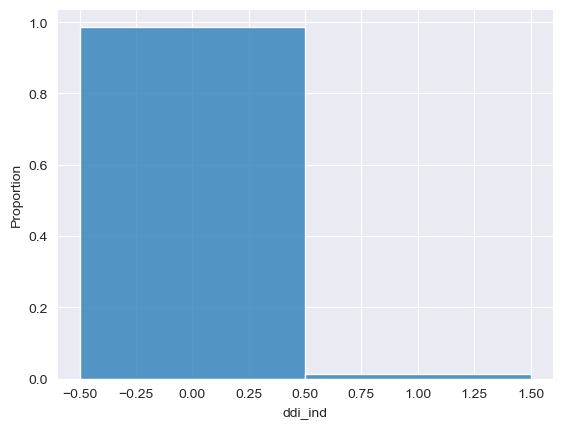

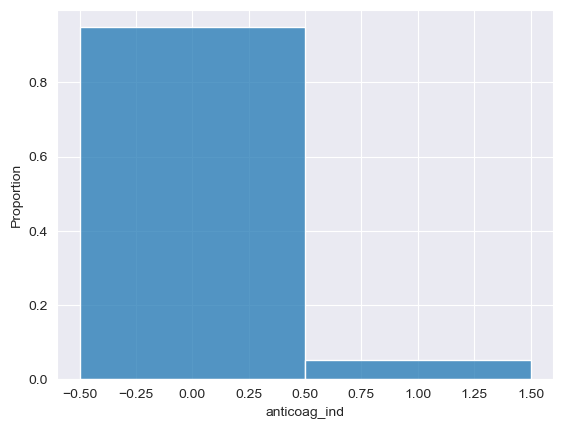

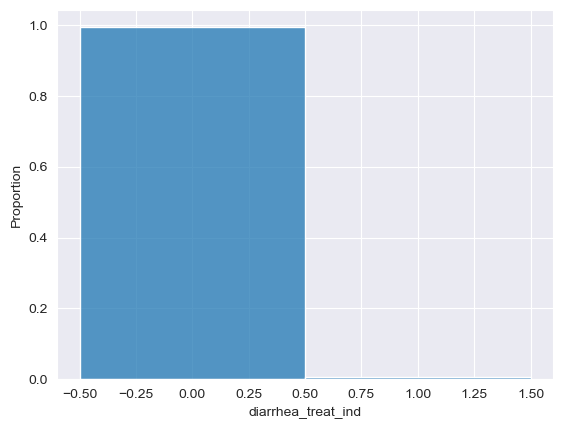

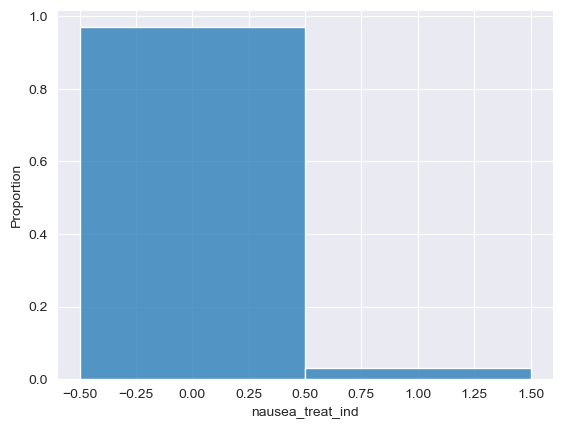

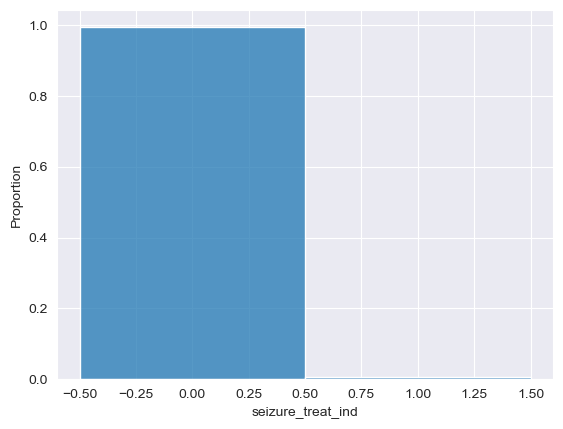

In [177]:
for var in categorical_vars:
    seaborn.histplot(rxclms_df, x=var, stat='proportion', discrete=True)
    plt.show()

In [209]:
numeric_vars = [list(rxclms_df.dtypes.where(rxclms_df.dtypes == 'float64').dropna().index),(list(rxclms_df.dtypes.where(rxclms_df.dtypes == 'int64').dropna().index))]
numeric_vars = [var for row in numeric_vars for var in row]

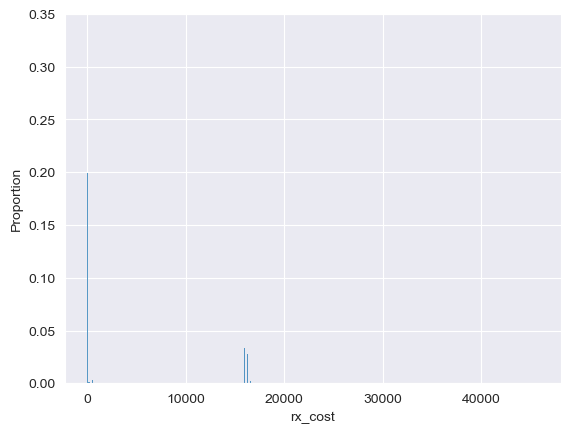

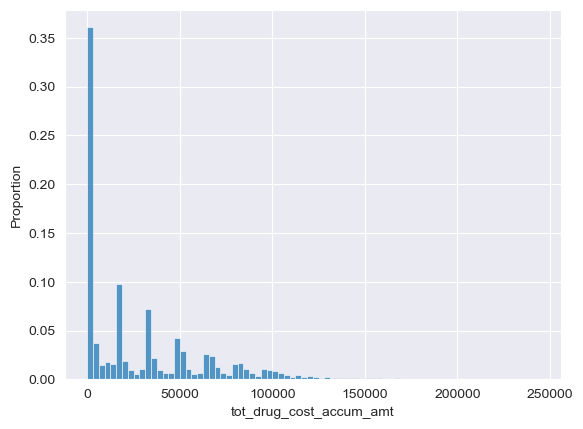

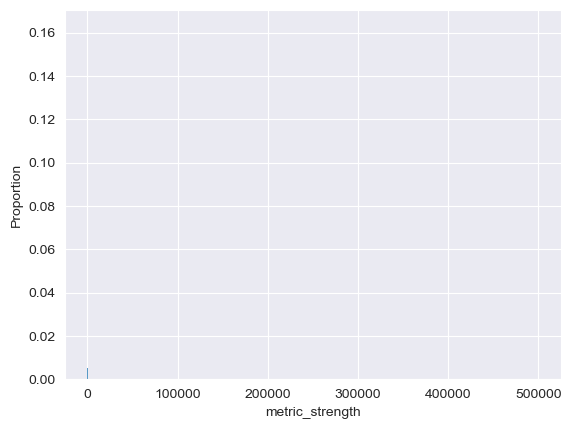

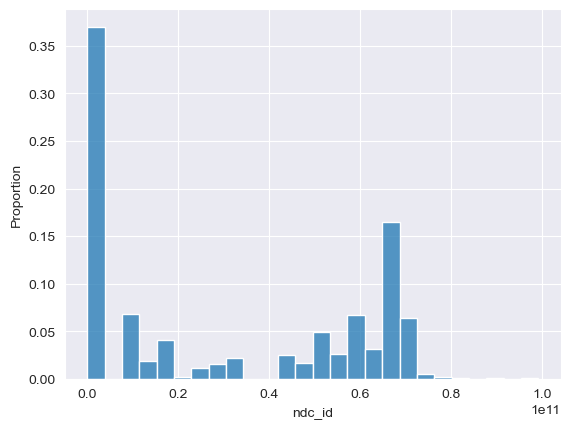

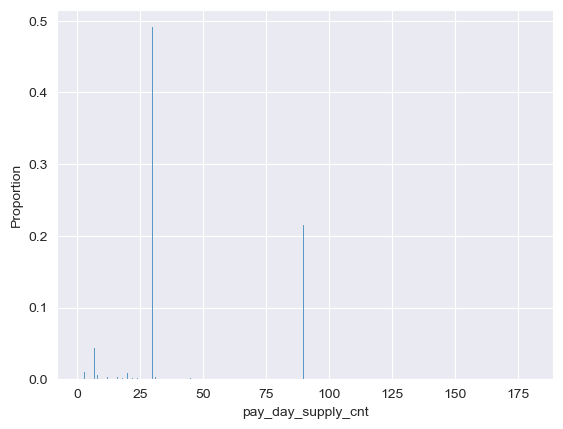

In [211]:
for var in numeric_vars:
    seaborn.histplot(rxclms_df, x=var, stat='proportion')
    plt.show()

## Med Claims

In [216]:
medclms_df = pd.read_csv(f'{data_path}/medclms_train.csv',
                        parse_dates=['visit_date', 'process_date'])
medclms_df

,therapy_id,medclm_key,clm_unique_key,primary_diag_cd,visit_date,diag_cd2,diag_cd3,diag_cd4,diag_cd5,diag_cd6,...,hedis_pot,clm_type,ade_diagnosis,seizure_diagnosis,pain_diagnosis,fatigue_diagnosis,nausea_diagnosis,hyperglycemia_diagnosis,constipation_diagnosis,diarrhea_diagnosis
0,1066310426-TAGRISSO-1,35908472910,649143000473431803,I70292,2019-09-10 00:00:00+00:00,I771,I739,R9431,Z7982,Z79899,...,Other,med,0,0,0,0,0,0,0,0
1,1094522162-TAGRISSO-1,37189420103,934834000476811903,J9601,2020-08-21 00:00:00+00:00,J910,NaN,NaN,NaN,NaN,...,Other,med,0,0,0,0,0,0,0,0
2,1104741185-TAGRISSO-1,37128499255,748244100476652103,E785,2020-07-14 00:00:00+00:00,I10,J324,NaN,NaN,NaN,...,Other,med,0,0,0,0,0,0,0,0
3,1012749208-TAGRISSO-1,36269844999,589034000474672103,C3492,2020-02-04 00:00:00+00:00,I825Z9,T83518A,N390,J942,J910,...,Other,med,0,0,0,0,0,0,0,0
4,1000110916-TAGRISSO-1,36448002258,663113000474981803,C3490,2020-03-05 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,...,Outpatient,med,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100154,1012918344-TAGRISSO-1,41412153341,854920100484292603,A419,2022-09-21 00:00:00+00:00,I21A1,Z66,J189,J9601,J9602,...,Other,med,0,0,0,0,0,0,0,0
100155,1101699376-TAGRISSO-1,41025577817,265874000483672003,J90,2022-04-29 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,...,Other,med,0,0,0,0,0,0,0,0
100156,1097097741-TAGRISSO-1,41232067211,218405100483981903,J449,2022-08-28 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,...,Other,med,0,0,0,0,0,0,0,0
100157,1033423711-TAGRISSO-1,90008439449,90008354718,C3490,2021-11-30 00:00:00+00:00,J910,NaN,NaN,NaN,NaN,...,Other,med,0,0,0,0,0,0,0,0


In [230]:
medclms_df.reversal_ind=medclms_df.reversal_ind.astype("category")
medclms_df.pot=medclms_df.pot.astype("category")
medclms_df.util_cat=medclms_df.util_cat.astype("category")
medclms_df.hedis_pot=medclms_df.hedis_pot.astype("category")
medclms_df.clm_type=medclms_df.clm_type.astype("category")
medclms_df.ade_diagnosis=medclms_df.ade_diagnosis.astype("category")
medclms_df.seizure_diagnosis=medclms_df.seizure_diagnosis.astype("category")
medclms_df.pain_diagnosis=medclms_df.pain_diagnosis.astype("category")
medclms_df.fatigue_diagnosis=medclms_df.fatigue_diagnosis.astype("category")
medclms_df.nausea_diagnosis=medclms_df.nausea_diagnosis.astype("category")
medclms_df.hyperglycemia_diagnosis=medclms_df.hyperglycemia_diagnosis.astype("category")
medclms_df.constipation_diagnosis=medclms_df.constipation_diagnosis.astype("category")
medclms_df.diarrhea_diagnosis=medclms_df.diarrhea_diagnosis.astype("category")

In [218]:
medclms_df.primary_diag_cd.unique()

array(['I70292', 'J9601', 'E785', ..., 'F4320', 'L244', 'R7401'],
      dtype=object)

In [219]:
medclms_df.diag_cd2.unique()

array(['I771', 'J910', 'I10', ..., 'H44522', 'M5441', 'H02401'],
      dtype=object)

In [231]:
medclms_df.dtypes

therapy_id                              object
medclm_key                               int64
clm_unique_key                           int64
primary_diag_cd                         object
visit_date                 datetime64[ns, UTC]
diag_cd2                                object
diag_cd3                                object
diag_cd4                                object
diag_cd5                                object
diag_cd6                                object
diag_cd7                                object
diag_cd8                                object
diag_cd9                                object
process_date               datetime64[ns, UTC]
reversal_ind                          category
pot                                   category
util_cat                              category
hedis_pot                             category
clm_type                              category
ade_diagnosis                         category
seizure_diagnosis                     category
pain_diagnosi

In [232]:
categorical_vars = medclms_df.dtypes.where(medclms_df.dtypes == 'category').dropna().index

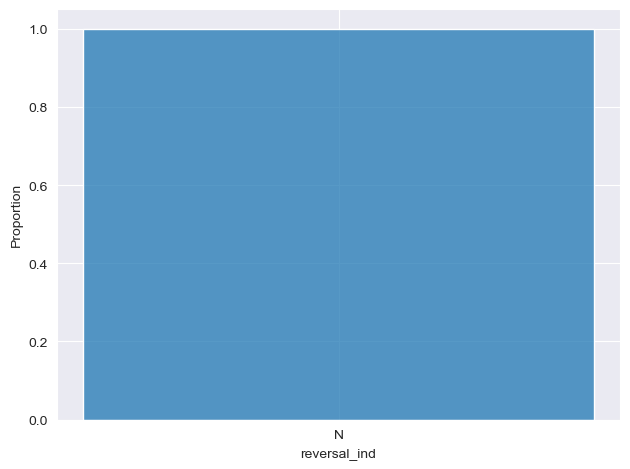

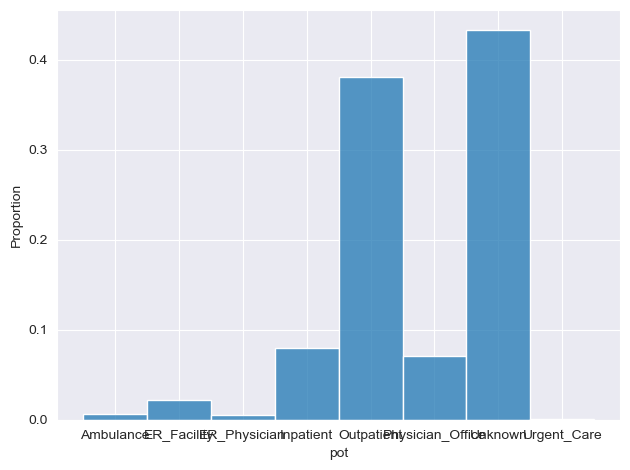

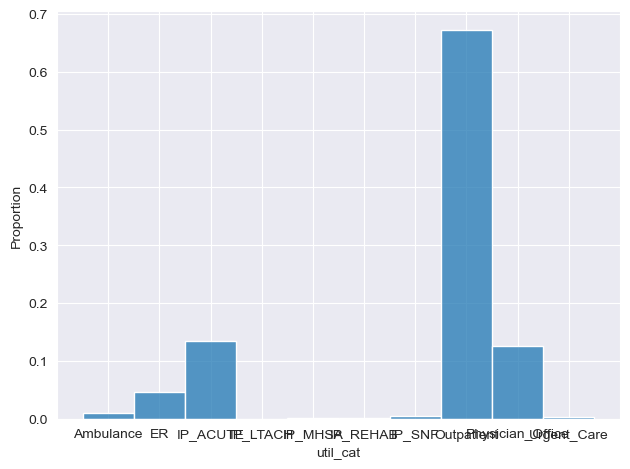

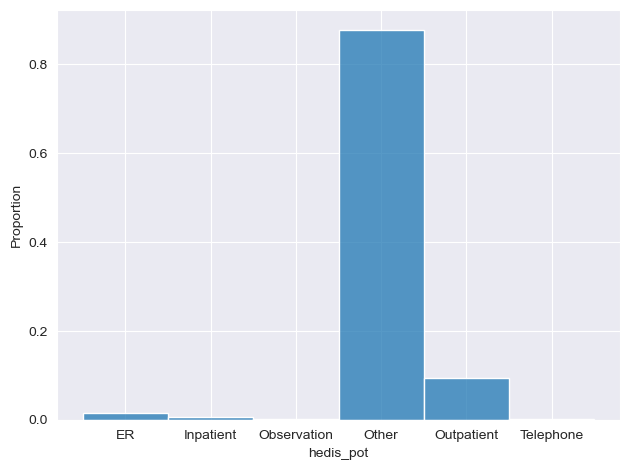

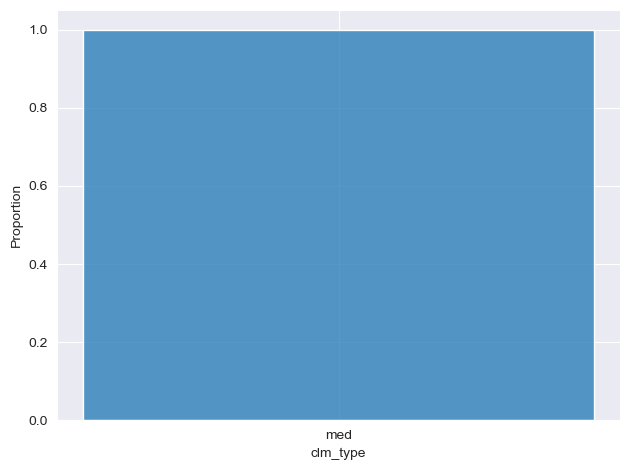

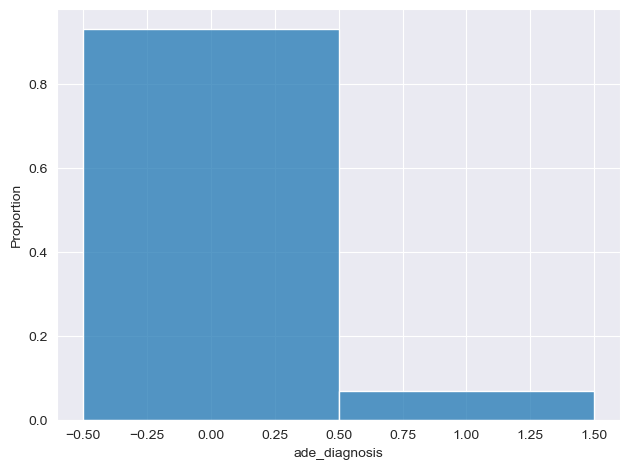

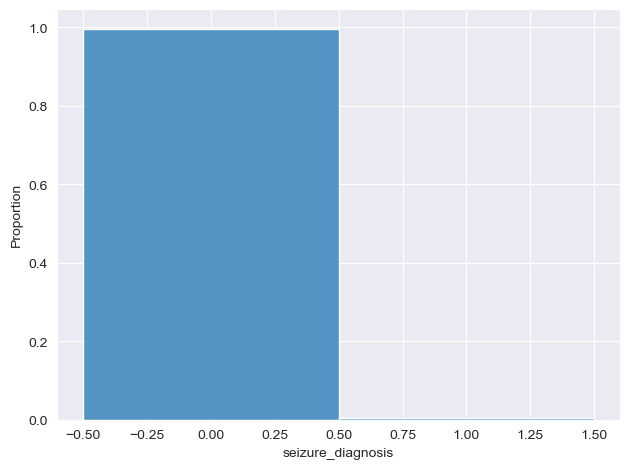

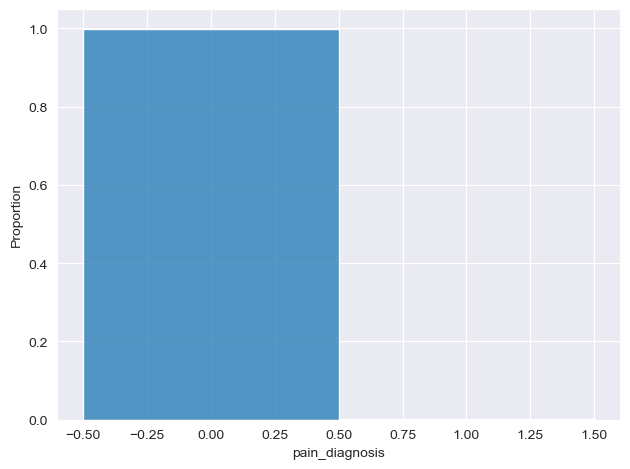

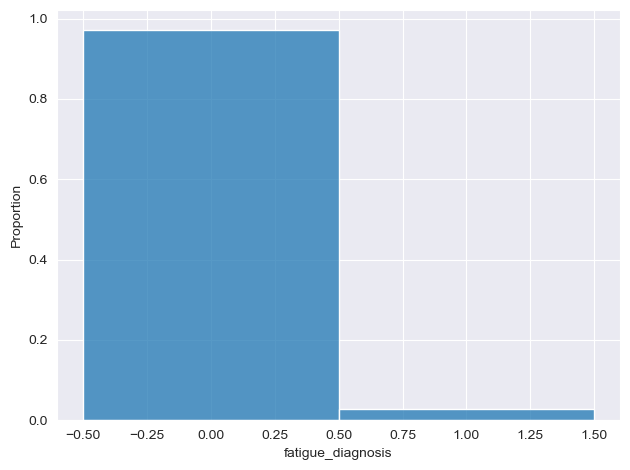

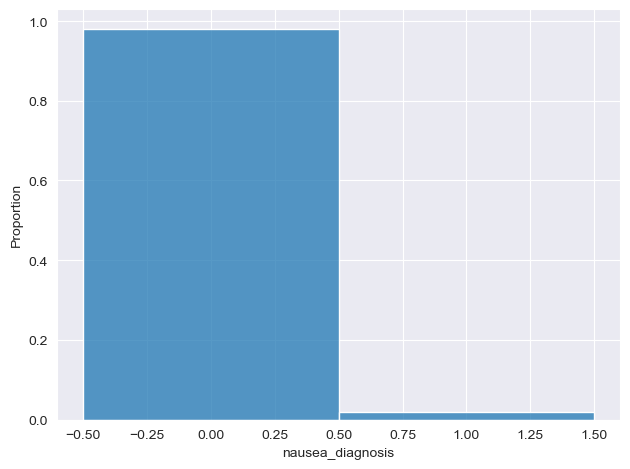

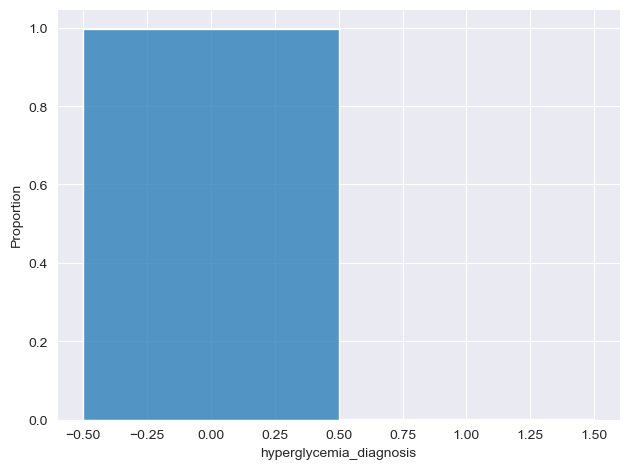

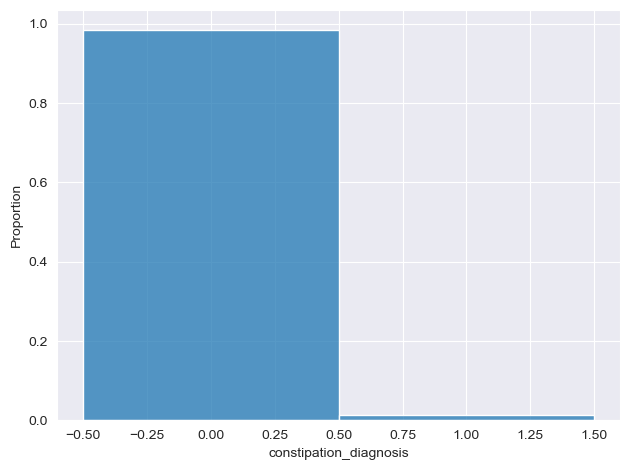

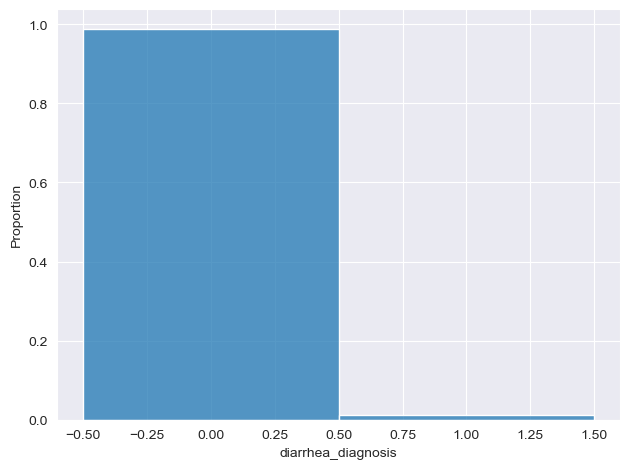

In [234]:
for var in categorical_vars:
    seaborn.histplot(medclms_df, x=var, stat='proportion', discrete=True)
    plt.tight_layout()
    plt.show()